In [1]:
# Import najważniejszych bibliotek

import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.regularizers import l2, l1
from tensorflow.keras import layers
from tensorflow.keras import activations

%matplotlib inline
import matplotlib.pyplot as plt
#from tensorflow import keras

### Tensory
Tensor - to podstawowa struktura danych w bibliotekach do Deep Learning.

Tensory możemy stworzyć na parę różnych sposobów.
1. Z list
2. Z tablic numpy
3. Zera, jedynki lub randomowe

In [2]:
rank_0_tensor = tf.constant(4)
rank_1_tensor = tf.constant([4, 5])
rank_2_tensor = tf.constant([[4, 5], [10, 2]])
rank_3_tensor = tf.constant([[[1, 2], [3, 4]],
                             [[5, 6], [7, 8]],
                             [[9, 10], [11, 12]]])
print(rank_0_tensor)
print(rank_1_tensor)
print(rank_2_tensor)
print(rank_3_tensor)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([4 5], shape=(2,), dtype=int32)
tf.Tensor(
[[ 4  5]
 [10  2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]], shape=(3, 2, 2), dtype=int32)


In [3]:
# Z arrayu numpy
array = np.random.uniform(0, 1, size=20)
tensor = tf.convert_to_tensor(array)
print(tensor)

tf.Tensor(
[0.93745915 0.76044261 0.86695239 0.66621235 0.7925992  0.95451204
 0.00184782 0.39435004 0.22998091 0.96930289 0.42611575 0.04204528
 0.4193906  0.36173059 0.42232758 0.57422403 0.6255255  0.62213937
 0.68162964 0.15857879], shape=(20,), dtype=float64)


In [4]:
# Randomowy
uniform_tensor = tf.random.uniform((1, 2), minval=0, maxval=100, seed=42)
normal_tensor = tf.random.normal((1, 2), mean=10, stddev=5, seed=42)

print(uniform_tensor)
print(normal_tensor)

tf.Tensor([[95.22714  67.740776]], shape=(1, 2), dtype=float32)
tf.Tensor([[8.596125 9.311239]], shape=(1, 2), dtype=float32)


In [5]:
### Zera lub jedynki
tensor_ones = tf.ones((2, 4))
tensor_zeros = tf.zeros((3, 2))

tensor_zeros

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

### Operacje na Tensorach

#### Slicing i indeksacja

In [6]:
tensor = tf.random.uniform((3, 4))

print(tensor)
print()
print(tensor[1])
print()
print(tensor[:, -1])
print()
print(tensor[-1, -1])

tf.Tensor(
[[0.5287205  0.19632292 0.2912954  0.64863217]
 [0.2887044  0.9524908  0.47933877 0.04290497]
 [0.9565264  0.47440577 0.8071176  0.62522185]], shape=(3, 4), dtype=float32)

tf.Tensor([0.2887044  0.9524908  0.47933877 0.04290497], shape=(4,), dtype=float32)

tf.Tensor([0.64863217 0.04290497 0.62522185], shape=(3,), dtype=float32)

tf.Tensor(0.62522185, shape=(), dtype=float32)


#### Transponowanie

In [7]:
tensor = tf.zeros((3, 4))
print(tensor)
print(tf.transpose(tensor))

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)


#### "Rozszerzanie" o wymiar

In [8]:
tensor_to_squeeze = tf.constant([[1] for i in range(10)])
print(tensor_to_squeeze)
print(tensor_to_squeeze.shape)
print(tf.squeeze(tensor_to_squeeze))

print(tf.expand_dims(tensor_to_squeeze, axis=1).shape)
print(tf.expand_dims(tensor_to_squeeze, axis=0).shape)

tf.Tensor(
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]], shape=(10, 1), dtype=int32)
(10, 1)
tf.Tensor([1 1 1 1 1 1 1 1 1 1], shape=(10,), dtype=int32)
(10, 1, 1)
(1, 10, 1)


#### Operacje arytmetyczne

In [9]:
print(tensor_to_squeeze)
print(tensor_to_squeeze * 2 + 5)

tf.Tensor(
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]], shape=(10, 1), dtype=int32)
tf.Tensor(
[[7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]], shape=(10, 1), dtype=int32)


#### Operacje macierzowe

In [10]:
tensor = tf.ones((4, 3), dtype=tf.dtypes.float32)
tensor2 = tf.random.uniform((3, 4))

print(tensor)
print(tensor2)

result = tf.linalg.matmul(tensor, tensor2)
print(result)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[0.47135532 0.60334456 0.13357627 0.8683964 ]
 [0.35558128 0.11420965 0.3764652  0.1293416 ]
 [0.19335425 0.29845023 0.14562249 0.10014439]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[1.0202909  1.0160044  0.65566397 1.0978824 ]
 [1.0202909  1.0160044  0.65566397 1.0978824 ]
 [1.0202909  1.0160044  0.65566397 1.0978824 ]
 [1.0202909  1.0160044  0.65566397 1.0978824 ]], shape=(4, 4), dtype=float32)


### API Warstw
W Keras podstawowym blokiem do budowania modeli są warstwy. W postaci warstw są wyrażone:
- Warstwy neuronów (Fully connected)
- Funkcje aktywacji
- Regularyzacje (Dropout)
- Batch Normalization

#### Przykład warstwy

In [11]:
input = tf.random.uniform((3, 4))
print(input)
hidden = tf.keras.layers.Dense(4)
print(hidden)
after_hidden = hidden(input)
print(after_hidden)

tf.Tensor(
[[0.30373597 0.51501834 0.42308986 0.24149907]
 [0.90994096 0.68027914 0.8873495  0.7887565 ]
 [0.6539296  0.35686195 0.8487021  0.6140716 ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[ 0.7396933  -0.13794088  0.12663731  0.25659367]
 [ 1.3566382   0.1983966   0.44730386  0.23380236]
 [ 0.92730665  0.17690966  0.3897118  -0.04893561]], shape=(3, 4), dtype=float32)


### Funkcja aktywacji

In [12]:
### Sigmoid
preds = tf.constant([0.2, 0.35, 0.45], dtype=tf.float32)
preds = tf.expand_dims(preds, axis=0)
tf.keras.activations.softmax(preds).numpy()

array([[0.29020336, 0.3371682 , 0.37262848]], dtype=float32)

In [13]:
### ReLU
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
tf.keras.activations.relu(foo).numpy()

array([ 0.,  0.,  0.,  5., 10.], dtype=float32)

# Zaczynamy tworzenie modelu

In [14]:
# Ładujemy dataset
df = tf.keras.datasets.fashion_mnist.load_data()

## *tf.keras.datasets.fashion_mnist.load_data()*:

- Zwraca nam krotkę Numpy array (x_train, y_train), (x_test, y_test)
- Niestandardowe dla nas dane (dotychczas operowaliśmy na DataFrame'ach)

#### Ładowanie zbioru danych

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

print(f"x_train type: {type(x_train)}")
print(f"x_train shape: {x_train.shape}")

print(f"y_train type: {type(y_train)}")
print(f"y_train shape: {y_train.shape}")

print(f"x_train type: {type(x_test)}")
print(f"x_train shape: {x_test.shape}")

print(f"y_train type: {type(y_test)}")
print(f"y_test shape: {y_test.shape}")

x_train type: <class 'numpy.ndarray'>
x_train shape: (60000, 28, 28)
y_train type: <class 'numpy.ndarray'>
y_train shape: (60000,)
x_train type: <class 'numpy.ndarray'>
x_train shape: (10000, 28, 28)
y_train type: <class 'numpy.ndarray'>
y_test shape: (10000,)


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
import pandas as pd

# pd.Series(y_train).value_counts()

Udało się wczytać i podzielić zbiór danych Fashion MNIST na zbiór trenujący i testowy.
Widać też od razu jaka jest wymiarowość zbioru.
Łącznie mamy 70000 obrazów do dyspozycji.

### **Co siedzi w pojedyńczym obrazku**

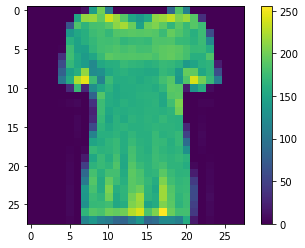

In [18]:
plt.figure()
plt.imshow(x_train[10]) # wybieramy jakikolwiek obrazek
plt.colorbar()
plt.grid(False)
plt.show()

Widzimy, że nasze obrazki przyjmują wartości od 0 do 255 dla kolorów.
Ponieważ chcemy zbudować model do klasyfikacji obrazków potrzebujemy znormalizować zbiór. W tym celu każdy obrazek będzie mieć znormalizowaną paletę kolorów do (0, 1) z (0, 255)

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

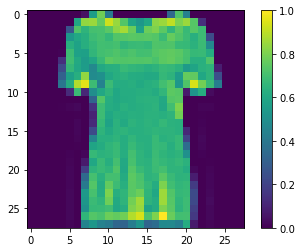

In [20]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

Wygląda jakby nasza operacja normalizacji nie zadziała, patrząc po samej kolorystyce obrazka. Zwróćmy uwagę na skalę, jednak poprawnie znormalizowaliśmy zbiór :)

### **Inicjalizacja modelu i budowanie warstw**

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'), #, 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### **Funkcje straty**
- binary cross entropy
- mse
...

In [23]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

### Optimizers
- Adam
- SGD
- RMSprop

In [24]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
optimizer = SGD(learning_rate = 0.01)

### **Metryki**
- accuracy
- precision
- recall

In [25]:
metrics = ['accuracy']

In [26]:
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = metrics)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
history_obj = model.fit(x_train,
                    y_train,
                    batch_size = 128,
                    epochs=10)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0859 - accuracy: 0.6712
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6843 - accuracy: 0.7789: 0s - loss: 0.7
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6004 - accuracy: 0.8030
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.8166: 0s - loss: 0.5
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5281 - accuracy: 0.8238
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5078 - accuracy: 0.8299
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4926 - accuracy: 0.8329: 0s - l
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4802 - accuracy: 0.8370
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4703 - accuracy: 0.8402
Epoch 10/20
469/469 [==============================] - 1s 2m

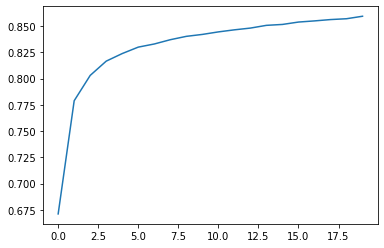

In [29]:
plt.plot(history_obj.history['accuracy'])

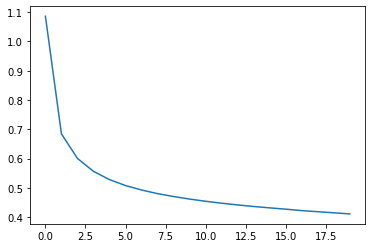

In [30]:
plt.plot(history_obj.history['loss'])

In [31]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f'\nTest accuracy: {round(100 * test_acc, 2)}')

313/313 - 1s - loss: 0.4470 - accuracy: 0.8445 - 533ms/epoch - 2ms/step

Test accuracy: 84.45


In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [33]:
model_output = model.predict(x_test)

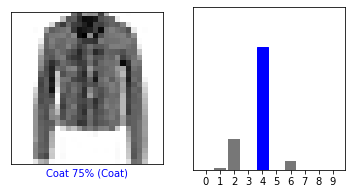

In [34]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, model_output[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, model_output[i],  y_test)
plt.show()

### Spróbujmy zrobić to lepiej

Planowane ulepszenia:
- Większy model
- Dłuższe trenowanie
- Bardziej zaawansowany optymalizator
- Regularyzacje
- Dropout
- Batch Norm

In [35]:
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


In [36]:
# Split datasets
old_train_x, old_train_y = x_train, x_train

train_x, val_x, train_y, val_y = train_test_split(x_train, x_train, test_size=0.2, random_state=42)
len(train_x)

48000

In [37]:
# kernel_regularizer = None
# bias_regularizer = None
kernel_regularizer = regularizers.l2(1e-5)
bias_regularizer = regularizers.l2(1e-5)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu',
                          kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer)
])

# model(x_train).shape
y_train.shape

(60000,)

In [38]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)
metrics = ['accuracy']

### **Wszystko w jednej funkcji**

In [39]:
def train_function(model, x_train, y_train, loss, optimizer, metrics=['accuracy'], batch_size=128, epochs=10):
    
    train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    
    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=metrics
    )
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=False
    )

    history = model.fit(
        train_x,
        train_y,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early_stopping],
        validation_data=(val_x, val_y)
    )

    return model, history.epoch, history.history

In [40]:
### Training here
_, _, history = train_function(model, x_train, y_train, loss, optimizer, batch_size=128, epochs=100)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.5538 - accuracy: 0.8085 - val_loss: 0.4298 - val_accuracy: 0.8474
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4125 - accuracy: 0.8532 - val_loss: 0.4739 - val_accuracy: 0.8236
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3708 - accuracy: 0.8667 - val_loss: 0.3826 - val_accuracy: 0.8637
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3546 - accuracy: 0.8735 - val_loss: 0.3813 - val_accuracy: 0.8613
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3427 - accuracy: 0.8743 - val_loss: 0.3727 - val_accuracy: 0.8661
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8806 - val_loss: 0.3842 - val_accuracy: 0.8696
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3189 - accuracy: 0.8846 - val_loss: 0.3299 - val_accuracy: 0.8821

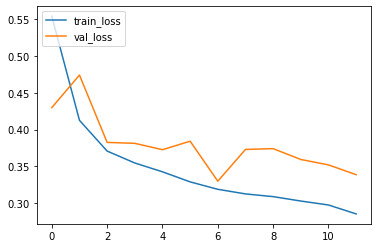

In [41]:
plt.plot(history['loss'], label="train_loss")
plt.plot(history['val_loss'], label="val_loss")

plt.legend(loc=2)

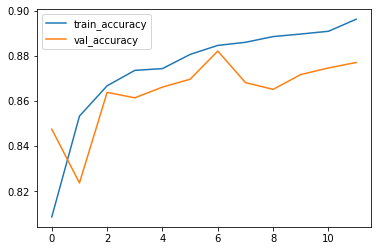

In [42]:
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()

In [43]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f'\nTest accuracy: {round(100 * test_acc, 2)}')

313/313 - 1s - loss: 0.3633 - accuracy: 0.8715 - 532ms/epoch - 2ms/step

Test accuracy: 87.15
